# MACHINE LEARNING AND ENGINEERING APPLICATIONS
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### Technical PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


[Vahid Moosavi](https://vahidmoosavi.com/)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# 5th Session 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;"> 03 April 2018</span>


### Topics to be discussed 

* **Linear Transformations**
* **PCA**
* **PCA in comparison to SOM, K-Means**
* **Auto-Encoders**


In [40]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
from scipy import stats
from ipywidgets import interact, HTML, FloatSlider

%matplotlib inline

## Some Basic notions in Linear Algebra

### A vector (or a point in n dimensional space)

In [41]:
x =  np.asarray([[2,2]])
x.shape

(1, 2)

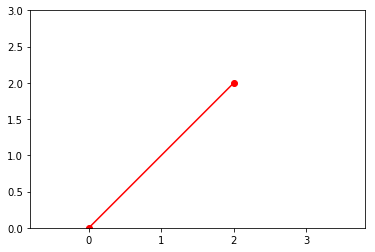

In [42]:
plt.plot([0,x[0,0]],[0,x[0,1]],'-or')
plt.axis('equal');
plt.xlim(0.0,3);
plt.ylim(0.0,3);


# Matrix Operation


### Matrices are acting as linear operator, moving every point from one location to another location


### We can write it like this too
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/7f32d668cc6edb290dc42e8e00db30dda68c1e29)

<a></a>



### Special Linear transformers
more examples: https://en.wikipedia.org/wiki/Linear_map#Examples_of_linear_transformation_matrices

In [43]:
#rotation 90 degrees
A =np.asarray([[0,-1],[1,0]])
print(np.matrix(A)) 
y = x.dot(A)
y.shape

[[ 0 -1]
 [ 1  0]]


(1, 2)

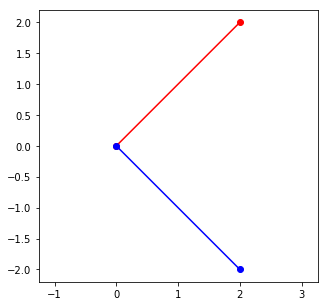

In [44]:
fig = plt.figure(figsize=(5,5))
plt.plot([0,x[0,0]],[0,x[0,1]],'-or')
plt.plot([0,y[0,0]],[0,y[0,1]],'-ob')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis('equal');

In [45]:
#rotation t degrees
t = np.pi/4.
A =np.asarray([[np.cos(t),-1*np.sin(t)],[np.sin(t),np.cos(t)]])

y = x.dot(A)
x.shape

(1, 2)

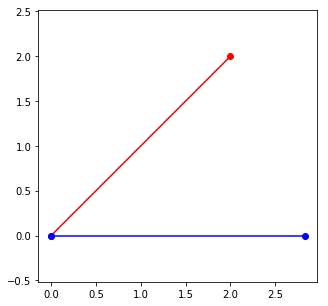

In [46]:
fig = plt.figure(figsize=(5,5))
plt.plot([0,x[0,0]],[0,x[0,1]],'-or')
plt.plot([0,y[0,0]],[0,y[0,1]],'-ob')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis('equal');

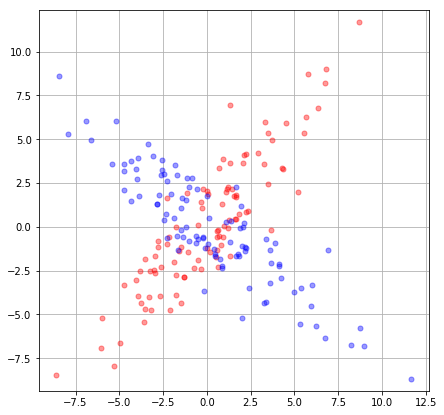

In [47]:
#rotation t degrees
t = 1*np.pi/2.
A =np.asarray([[np.cos(t),-1*np.sin(t)],[np.sin(t),np.cos(t)]])


N = 100
x1= np.random.uniform(low=0,high=10,size=N)[:,np.newaxis]
x1= np.random.normal(loc=0,scale=3,size=N)[:,np.newaxis]
x2 = 1*x1 + np.random.normal(loc=0.0, scale=1.7, size=N)[:,np.newaxis]

X = np.concatenate((x1,x2),axis=1)

Y = X.dot(A)

fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(X[:,0],X[:,1],'.r',markersize=10,alpha=.4 );


ax1= plt.subplot(111)
plt.plot(Y[:,0],Y[:,1],'.b',markersize=10,alpha=.4 );


plt.grid();
plt.axis('equal');



# Let's go back to Data Driven models and Machine Learning

### where we are interested to find certain matrices
### While in the previous examples, we have a matrix and then, want to see how the system will behave.

### But in machine learning we are usually interested in designing or learning certain operators

## Principal component analysis (PCA)
### Comes with many different names in different fileds
* **https://en.wikipedia.org/wiki/Principal_component_analysis**

## The basic idea: 
### we have observed  $ x $ 
## Is it possible to to find a transformation, where in the new space the new dimensions are uncorrelated? 


##  $$x = \sum_{i = 1}^n a_i. p_i$$

## $p_i$ is an n dimensional column vector. 

### all the $p_i$ are independent to each other!

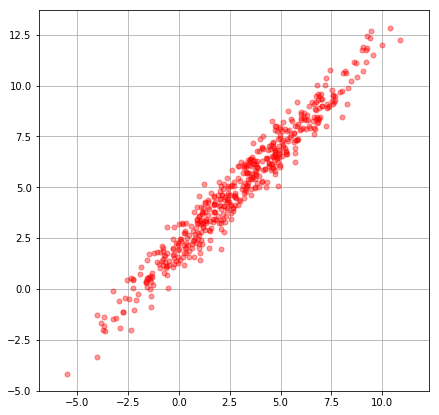

In [48]:
N = 500
x1= np.random.uniform(low=0,high=10,size=N)[:,np.newaxis]
x1= np.random.normal(loc=3,scale=3,size=N)[:,np.newaxis]
x2 = 1*x1 + np.random.normal(loc=2.0, scale=0.7, size=N)[:,np.newaxis]

X = np.concatenate((x1,x2),axis=1)



fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(X[:,0],X[:,1],'.r',markersize=10,alpha=.4 );
plt.grid();
plt.axis('equal');

## PC transformation is to fit an ellipsoid to the data, where the lenght of each axis of the ellipsoid is equal to the variation in that direction

# How to find PCs?
## There are many ways, but the most common one is through eigenvalue decomposition
### The prefix eigen- is adopted from the German word eigen for "proper", "characteristic"
### In that sense PCA is a part of "Matrix Decomposition" field
* **https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Eigenvalues_and_eigenvectors_of_matrices**


### The eigen vectors of covariance matrix are PCA

## Covariance and Correlation
https://en.wikipedia.org/wiki/Covariance

In [49]:

print ('Covariance')
print (np.cov(X.T))
print ('\n')
print ('Correlation')
print (np.corrcoef(X.T))

Covariance
[[9.11403487 9.14364764]
 [9.14364764 9.59965144]]


Correlation
[[1.         0.97754421]
 [0.97754421 1.        ]]


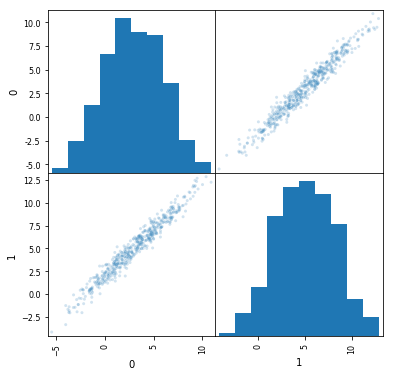

In [50]:
# look how dependent are the two original dimensions 
# X_trans = X.dot(PCs[:,:5])
DF = pd.DataFrame(data=X)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(DF, alpha=0.2, figsize=(6, 6), diagonal='hist');

## how to estimate the covariance matrix

In [51]:
# Normalizing it around 0
X_w = X-np.mean(X,axis=0)

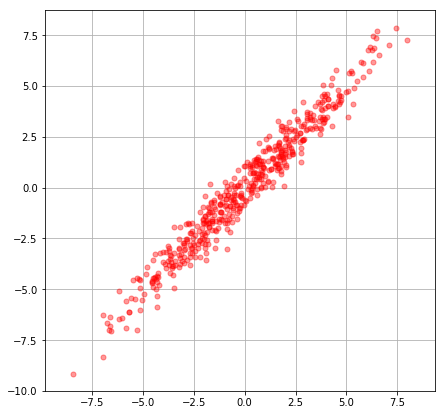

In [52]:
fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(X_w[:,0],X_w[:,1],'.r',markersize=10,alpha=.4 );
plt.grid();
plt.axis('equal');

In [53]:
# We estimate the Covariance matrix as below:
XTX = X_w.T.dot(X_w)/(X_w.shape[0]-1)
np.around(XTX,decimals=3)

array([[9.114, 9.144],
       [9.144, 9.6  ]])

In [54]:
## Using numpy on X
COVX = np.cov(X.T)
np.around(COVX,decimals=3)

array([[9.114, 9.144],
       [9.144, 9.6  ]])

## Singular Value Decomposition
#### If we calculate the eigenvectors of the covariance matrix, they are the requested operator in PCA
* **https://en.wikipedia.org/wiki/Principal_component_analysis#Singular_value_decomposition**

In [55]:
VARs,PCs = np.linalg.eig(XTX)
# VARs,PCs = np.linalg.eig(np.cov(X.T))
indsort = np.argsort(VARs*-1,)
PCs = PCs[:,indsort]
VARs = VARs[indsort]

# we need to normalize the vars
VARs = VARs/np.sum(VARs)
print (np.sum(VARs))

0.9999999999999999


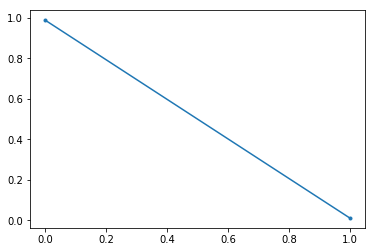

In [56]:
plt.plot(VARs,'.-')

In [57]:
PCs

array([[-0.6976584 , -0.71643056],
       [-0.71643056,  0.6976584 ]])

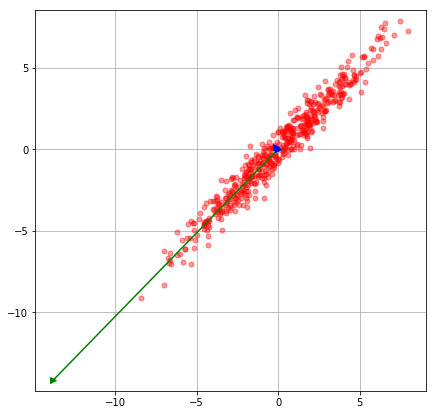

In [58]:
fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(X_w[:,0],X_w[:,1],'.r',markersize=10,alpha=.4 );
plt.plot([0,PCs[0,0]*VARs[0]*20],[0,PCs[1,0]*VARs[0]*20],'->g')
plt.plot([0,PCs[0,1]*VARs[1]*20],[0,PCs[1,1]*VARs[1]*20],'->b')
plt.grid();
plt.axis('equal');

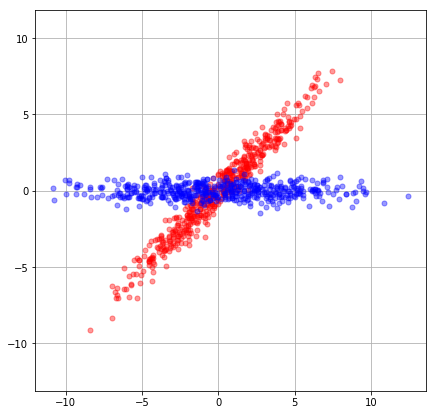

In [59]:
fig = plt.figure(figsize=(7,7))

## Now we can transform the data
X_trans = X_w.dot(PCs[:])
plt.plot(X_w[:,0],X_w[:,1],'.r',markersize=10,alpha=.4 );
plt.plot(X_trans[:,0],X_trans[:,1],'.b',markersize=10,alpha=.4 );
plt.grid();
plt.axis('equal');

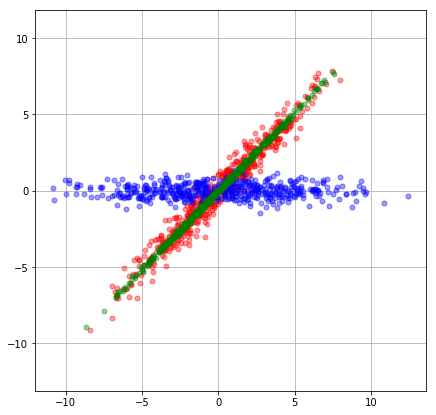

In [60]:

fig = plt.figure(figsize=(7,7))



X_trans = X_w.dot(PCs[:])


plt.plot(X_w[:,0],X_w[:,1],'.r',markersize=10,alpha=.4 );
plt.plot(X_trans[:,0],X_trans[:,1],'.b',markersize=10,alpha=.4 );


# Parametric transformation (back and forth)
X_ =   X_trans.dot(([1,0.15]*PCs).T)

plt.plot(X_ [:,0],X_ [:,1],'.g',markersize=10,alpha=.4 );

plt.grid();
plt.axis('equal');

### Now testing the original idea of PCA

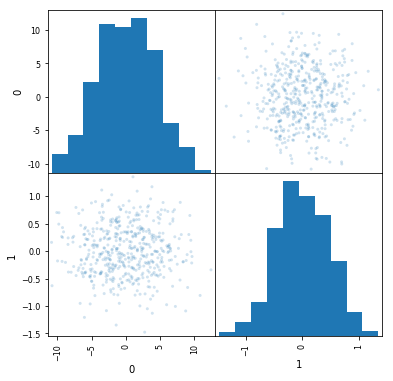

In [61]:
# look how uncorrelated they are 
X_trans = X_w.dot(PCs)
DF = pd.DataFrame(data=X_trans)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(DF, alpha=0.2, figsize=(6, 6), diagonal='hist');

In [62]:
# This shows the orthogonality
np.around(np.cov(X_trans.T),decimals=2)

array([[18.5 ,  0.  ],
       [ 0.  ,  0.21]])

# What is this good for?
### Dimensionality reduction and feature extraction -- > To reduce the curse of dimensionality for prediction problems (Very classic)
### Data Compression
### Generative space

# Data Compression

#### Let's imagine an image is a matrix, where each row is a vector

(757, 523, 3)

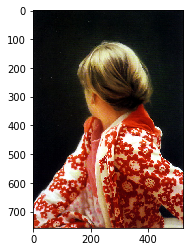

In [63]:
# Image compression
img = plt.imread('./Data/richter_betty.png')
plt.imshow(img)
img.shape

In [64]:
def PCA_np(Y):
    Y_mean = np.mean(Y,axis=0)
    Y = Y - Y_mean 
    # local centering
#     Y -= Y.mean(axis=1).reshape(Y.shape[0], -1)

    YTY = Y.T.dot(Y)
    
    VARs,PCs = np.linalg.eig(YTY)
    VARs = np.real(VARs)
    PCs = np.real(PCs)
    indsort = np.argsort(VARs*-1,)
    PCs = PCs[:,indsort]
    VARs = VARs[indsort]
    VARs = VARs/np.sum(VARs)
    return PCs,VARs

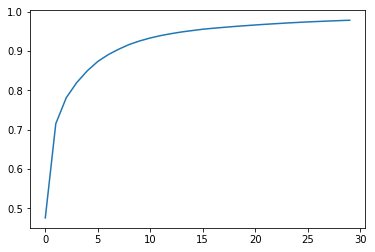

In [65]:
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]


PCs_R,VARs_R = PCA_np(R)
PCs_G,VARs_G = PCA_np(G)
PCs_B,VARs_B = PCA_np(B)


#Explained Variance
plt.plot(np.cumsum(VARs_R[:30]));

In [66]:


def recon_(n_comps=1):
    fig = plt.figure(figsize=(7,7))
    R_tran= R.dot(PCs_R[:,:n_comps])
    G_tran= G.dot(PCs_G[:,:n_comps])
    B_tran= B.dot(PCs_B[:,:n_comps])
    
    
    R_= R_tran.dot(PCs_R[:,:n_comps].T)
    G_= G_tran.dot(PCs_G[:,:n_comps].T)
    B_= B_tran.dot(PCs_B[:,:n_comps].T)
    
    
    mn = np.min(R_)
    mx = np.max(R_)
    R_ = (R_-mn)/(mx-mn)
    
    
    mn = np.min(G_)
    mx = np.max(G_)
    G_ = (G_-mn)/(mx-mn)
    
    mn = np.min(B_)
    mx = np.max(B_)
    B_ = (B_-mn)/(mx-mn)
    
    img_rec = np.concatenate((R_[:,:,np.newaxis],G_[:,:,np.newaxis],B_[:,:,np.newaxis]),axis=2)
    plt.imshow(img_rec)


interact(recon_, n_comps=(0,100,1))


interactive(children=(IntSlider(value=1, description='n_comps'), Output()), _dom_classes=('widget-interact',))

<function __main__.recon_>

# MNIST data set

In [67]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

"""Test the autoencoder using MNIST."""
# %%
# load MNIST as before
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
mean_img = np.mean(mnist.train.images, axis=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [68]:
import random
test_xs = mnist.test.images
test_xs_labels= mnist.test.labels
train_xs_labels= mnist.train.labels

train_xs = mnist.train.images
train_xs_norm = np.array([img - mean_img for img in train_xs])
test_xs_norm = np.array([img - mean_img for img in test_xs])
import random
ind_row_test = random.sample(range(test_xs.shape[0]),2000)
ind_row_train = random.sample(range(train_xs.shape[0]),1000)

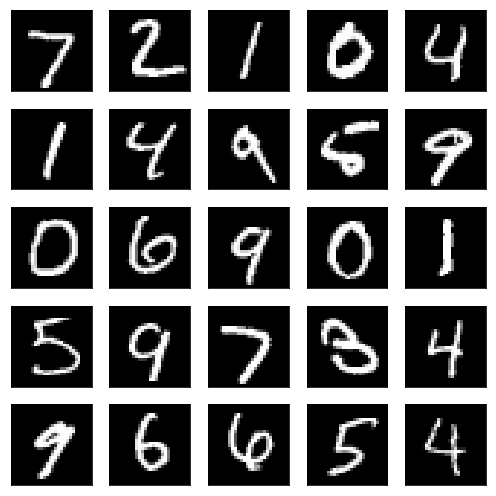

In [69]:
fig = plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_xs[i].reshape(28,28),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

In [70]:
PCs,VARs = PCA_np(test_xs[ind_row_test])

In [71]:
PCs.shape

(784, 784)

# Eigen Pictures

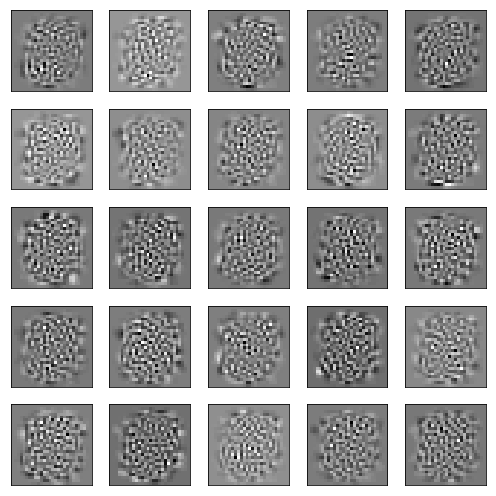

In [72]:
fig = plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    #We have 784 PCs
    plt.imshow(PCs[:,200+i].reshape(28,28),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

# Encoder-Decoder Networks
### What is happening in compression example, can be seen as two steps of encoding and decoding

In [73]:
# Just for visulization of nn architecture
#Taken from: https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    print (v_spacing/4)
    radius = np.min([v_spacing/4,.03])
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), radius,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
        
            if n==0:
                if m<5:
                    ax.text(n*h_spacing + .9*left, layer_top - m*v_spacing,'$x_{}$'.format(m) , fontsize=10,zorder=10)
            elif n==(len(layer_sizes)-1):
                if m<5:
                    ax.text(n*h_spacing + .9*left, layer_top - m*v_spacing,'$y_{}$'.format(m) , fontsize=10,zorder=10)
            else:
                if m<5:
                    ax.text(n*h_spacing + .9*left, layer_top - m*v_spacing,'$f_{}$'.format(m) , fontsize=10,zorder=10)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='gray')
                x = n*h_spacing + left
                y = layer_top_a - m*v_spacing
                dx = (n + 1)*h_spacing + left - x - 1.3*radius
                dy = layer_top_b - o*v_spacing -y 
                line = plt.arrow(x,y,dx,dy, color='gray',head_width=.01,head_length=.01)
                ax.add_artist(line)

## First part is an encoder
## Second part is a decoder

## If we use all the PCs we don't loos any information, otherwise, we do

0.02


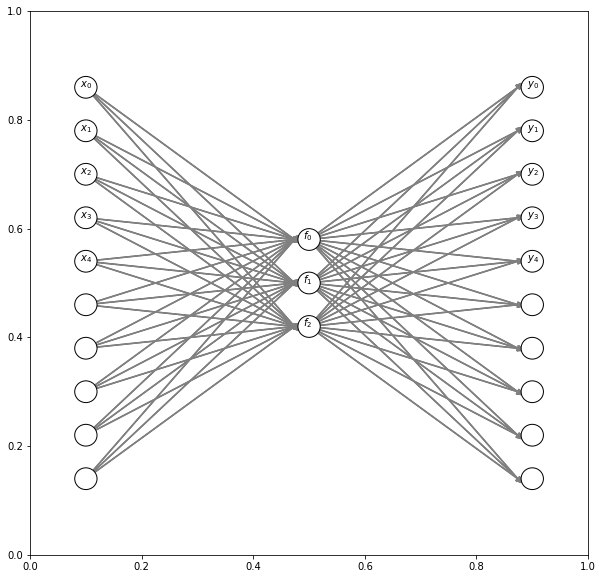

In [75]:
fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [10,3,10],)

In [76]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(test_xs_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [77]:
W_pca = pca.components_
W_pca.shape

(784, 784)

## No dimensionality reduction
### No reconstruction error

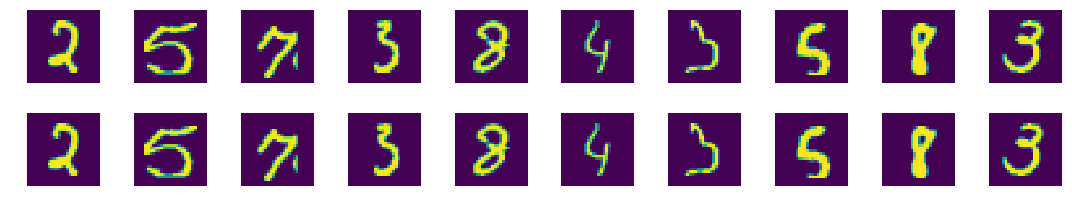

In [78]:
W_pca = pca.components_
sel_comp = W_pca.shape[1]
lowdim_PCA = test_xs_norm.dot(W_pca[:,:sel_comp])
lowdim_PCA.shape
recon_PCA = lowdim_PCA.dot(W_pca[:,:sel_comp].T)+ mean_img
n_examples = 10
fig, axs = plt.subplots(2, n_examples, figsize=(15, 3))
for example_i,ind in enumerate(ind_row_test[:n_examples]):
    axs[0][example_i].imshow(
        np.reshape(test_xs[ind, :], (28, 28)))
    axs[0][example_i].set_axis_off()
    axs[1][example_i].imshow(
            np.reshape([recon_PCA[ind, :]], (28, 28)))
    axs[1][example_i].set_axis_off()

fig.show()
plt.tight_layout()    

## With dimensionality reduction
### Reconstruction error

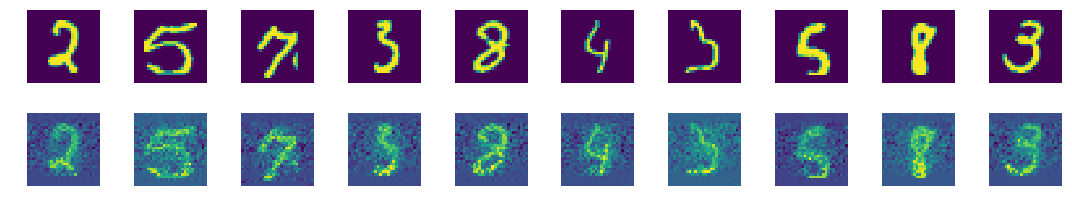

In [79]:
W_pca = pca.components_
sel_comp = 400
lowdim_PCA = test_xs_norm.dot(W_pca[:,:sel_comp])
lowdim_PCA.shape
recon_PCA = lowdim_PCA.dot(W_pca[:,:sel_comp].T)+ mean_img
n_examples = 10
fig, axs = plt.subplots(2, n_examples, figsize=(15, 3))
for example_i,ind in enumerate(ind_row_test[:n_examples]):
    axs[0][example_i].imshow(
        np.reshape(test_xs[ind, :], (28, 28)))
    axs[0][example_i].set_axis_off()
    axs[1][example_i].imshow(
            np.reshape([recon_PCA[ind, :]], (28, 28)))
    axs[1][example_i].set_axis_off()

fig.show()
plt.tight_layout()    

## With more dimensionality reduction

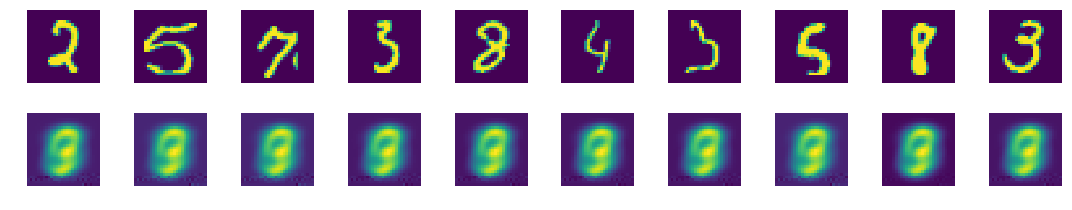

In [80]:
W_pca = pca.components_
sel_comp = 2
lowdim_PCA = test_xs_norm.dot(W_pca[:,:sel_comp])
lowdim_PCA.shape
recon_PCA = lowdim_PCA.dot(W_pca[:,:sel_comp].T)+ mean_img
n_examples = 10
fig, axs = plt.subplots(2, n_examples, figsize=(15, 3))
for example_i,ind in enumerate(ind_row_test[:n_examples]):
    axs[0][example_i].imshow(
        np.reshape(test_xs[ind, :], (28, 28)))
    axs[0][example_i].set_axis_off()
    axs[1][example_i].imshow(
            np.reshape([recon_PCA[ind, :]], (28, 28)))
    axs[1][example_i].set_axis_off()

fig.show()
plt.tight_layout()    

In [81]:
pca = PCA(n_components=20)
pca.fit(test_xs_norm)
digits_trans = pca.transform(test_xs_norm)

In [82]:
def plot_2d(pc1=0,pc2=1):
    fig = plt.figure(figsize=(7,7));
    sc = plt.scatter(digits_trans[:,pc1],digits_trans[:,pc2],s=10,c=np.argmax(test_xs_labels,axis=1),cmap=plt.cm.hot_r, vmin=0, vmax=9);
    plt.colorbar(sc);
interact(plot_2d, pc1=(0,19,1),pc2=(0,19,1))


interactive(children=(IntSlider(value=0, description='pc1', max=19), IntSlider(value=1, description='pc2', max=19), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_2d>

# Over complete representations
## What if we relax the assumptin of orthonormality

## And as we discussed last week, think about as K-means as a kind of transformation
## Then, each cluster center is pointing toward a dimensionality

In [83]:
# If we increase the the number of clusters
from sklearn.cluster import KMeans
n_clusters = 50
X = test_xs_norm
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
kmeans.cluster_centers_.shape

X_transformed_kmeans = X.dot(kmeans.cluster_centers_.T)
X_transformed_kmeans.shape

(10000, 50)

In [84]:
X.shape

(10000, 784)

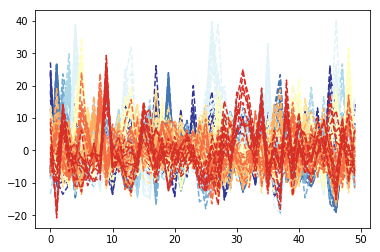

In [85]:
cluster_inds = kmeans.predict(X)
K = 10
for i in range(K):
#     plt.plot(X_transformed_kmeans[cluster_inds==i].T,'C{}'.format(i));
    plt.plot(X_transformed_kmeans[cluster_inds==i][:10].T,'--',color=plt.cm.RdYlBu_r(float(i)/K));

In [86]:
KMeans_comps = kmeans.cluster_centers_.T
KMeans_comps.shape

(784, 50)

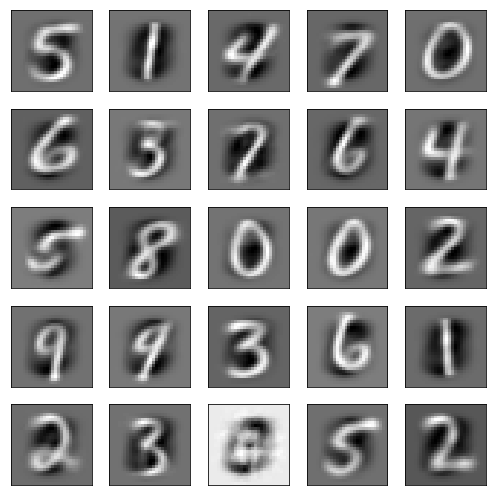

In [87]:
fig = plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    #We have 784 PCs
    plt.imshow(KMeans_comps[:,0+i].reshape(28,28),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

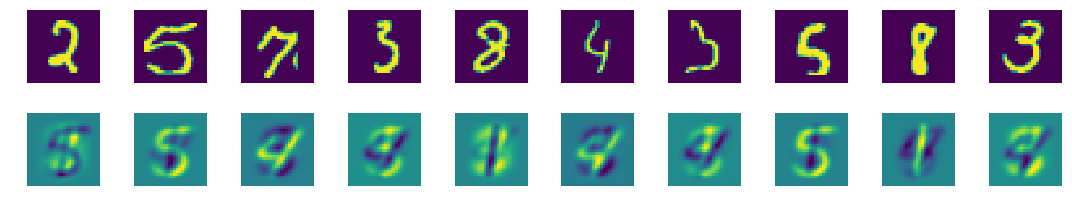

In [88]:
sel_comp = 3
lowdim_Kmeans = test_xs_norm.dot(KMeans_comps[:,:sel_comp])
lowdim_PCA.shape
recon_Kmeans = lowdim_Kmeans.dot(KMeans_comps[:,:sel_comp].T)+ mean_img
n_examples = 10
fig, axs = plt.subplots(2, n_examples, figsize=(15, 3))
for example_i,ind in enumerate(ind_row_test[:n_examples]):
    axs[0][example_i].imshow(
        np.reshape(test_xs[ind, :], (28, 28)))
    axs[0][example_i].set_axis_off()
    axs[1][example_i].imshow(
            np.reshape([recon_Kmeans[ind, :]], (28, 28)))
    axs[1][example_i].set_axis_off()

fig.show()
plt.tight_layout()    

In [89]:
def plot_2d(pc1=0,pc2=1):
    fig = plt.figure(figsize=(7,7));
    sc = plt.scatter(X_transformed_kmeans[:,pc1],X_transformed_kmeans[:,pc2],s=10,c=np.argmax(test_xs_labels,axis=1),cmap=plt.cm.hot_r, vmin=0, vmax=9);
    plt.colorbar(sc);
interact(plot_2d, pc1=(0,n_clusters-1,1),pc2=(0,n_clusters-1,1))

interactive(children=(IntSlider(value=0, description='pc1', max=49), IntSlider(value=1, description='pc2', max=49), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_2d>

## We can think about of K-means in an encoder/ decoder setup
# PCA is based on a geometric transformation and we know the importance of each component (i.e. information gains)
# But in K-means there is no guarantee for this!

### Nevertheless, it works and practically is very powerful


0.01


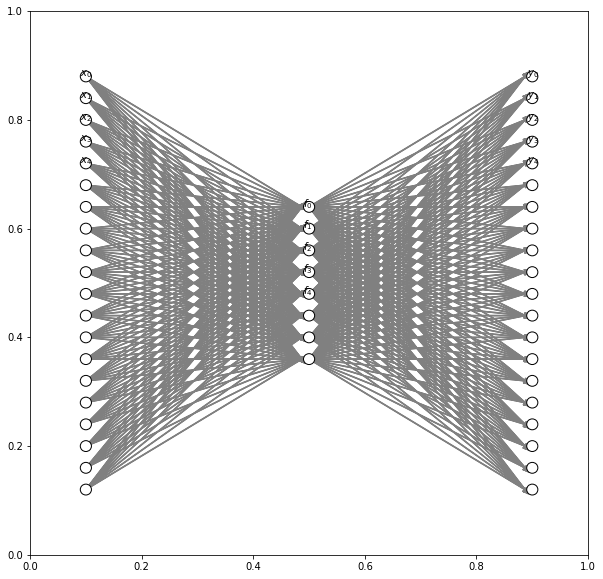

In [90]:
fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [20,8,20])

# Auto-Encoders
# What if we make sure after reconstruction we get what we want?
## Remember Least Square Errors?
### Now we define reconstruction error!
# Therefore, we use gradient descent to train the network and let it learn the components! 


0.01


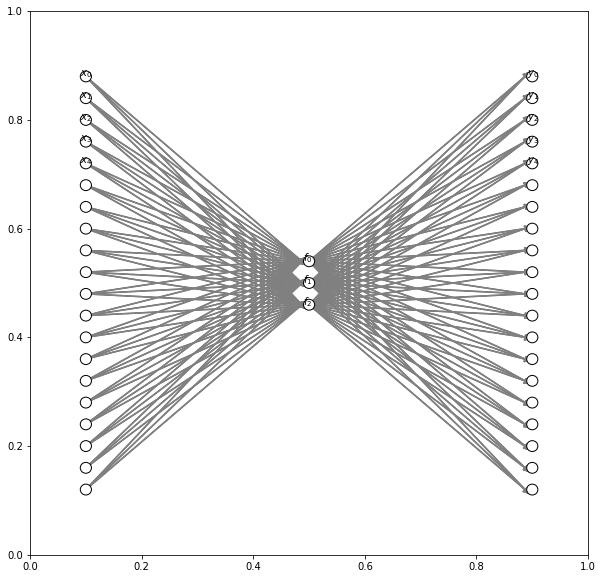

In [91]:
fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [20,3,20],)

# Deep Auto-Encoders
### Also if we do several steps of transformations

0.01


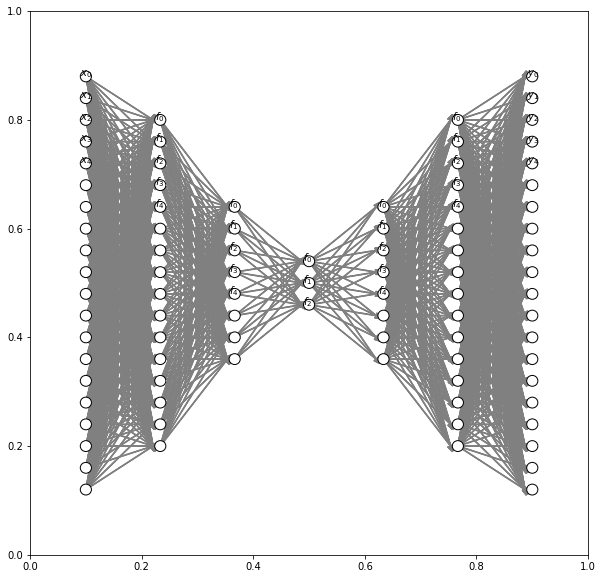

In [92]:
fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [20,16,8,3,8,16,20],)

## We can think of the middle layer as a new representation of the data
# Important note: Forget about the meaning of the middle layer! 

# Tensorflow model

In [93]:
"""Tutorial on how to create an autoencoder w/ Tensorflow.
Parag K. Mital, Jan 2016
"""
# %% Imports
import tensorflow as tf
import numpy as np
import math


# %% Autoencoder definition
def autoencoder(dimensions=[784, 512, 256, 64]):
    """Build a deep autoencoder w/ tied weights.
    Parameters
    ----------
    dimensions : list, optional
        The number of neurons for each layer of the autoencoder.
    Returns
    -------
    x : Tensor
        Input placeholder to the network
    z : Tensor
        Inner-most latent representation
    y : Tensor
        Output reconstruction of the input
    cost : Tensor
        Overall cost to use for training
    """
    # %% input to the network
    x = tf.placeholder(tf.float32, [None, dimensions[0]], name='x')
    current_input = x

    # %% Build the encoder
    encoder = []
    for layer_i, n_output in enumerate(dimensions[1:]):
        n_input = int(current_input.get_shape()[1])
        W = tf.Variable(
            tf.random_uniform([n_input, n_output],
                              -1.0 / math.sqrt(n_input),
                              1.0 / math.sqrt(n_input)))
        b = tf.Variable(tf.zeros([n_output]))
        encoder.append(W)
#         output = tf.nn.sigmoid(tf.matmul(current_input, W) + b)
        output = tf.nn.tanh(tf.matmul(current_input, W) + b)
        current_input = output

    # %% latent representation
    z = current_input
    encoder.reverse()

    # %% Build the decoder using the same weights
    for layer_i, n_output in enumerate(dimensions[:-1][::-1]):
        W = tf.transpose(encoder[layer_i])
        b = tf.Variable(tf.zeros([n_output]))
        output = tf.nn.tanh(tf.matmul(current_input, W) + b)
        current_input = output

    # %% now have the reconstruction through the network
    y = current_input

    # %% cost function measures pixel-wise difference
    cost = tf.reduce_sum(tf.square(y - x))
    return {'x': x, 'z': z, 'y': y, 'cost': cost}


# Keras model
https://blog.keras.io/building-autoencoders-in-keras.html

In [94]:
from keras.layers import Input, Dense
from keras.models import Model

In [95]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats



input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)


# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)



In [96]:
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)




In [97]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
autoencoder = Model(input_img, decoded)

In [98]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
deco = autoencoder.layers[-3](encoded_input)
deco = autoencoder.layers[-2](deco)
deco = autoencoder.layers[-1](deco)
# create the decoder model
decoder = Model(encoded_input, deco)

In [99]:
# this model maps an input to its reconstruction
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(train_xs, train_xs,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(test_xs, test_xs))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 51us/step - loss: 0.3703 - val_loss: 0.2635
Epoch 2/10
55000/55000 [==============================] - 3s 46us/step - loss: 0.2600 - val_loss: 0.2552
Epoch 3/10
55000/55000 [==============================] - 2s 44us/step - loss: 0.2487 - val_loss: 0.2381
Epoch 4/10
55000/55000 [==============================] - 3s 47us/step - loss: 0.2300 - val_loss: 0.2194
Epoch 5/10
55000/55000 [==============================] - 2s 44us/step - loss: 0.2145 - val_loss: 0.2069
Epoch 6/10
55000/55000 [==============================] - 2s 43us/step - loss: 0.2040 - val_loss: 0.1981
Epoch 7/10
55000/55000 [==============================] - 2s 42us/step - loss: 0.1962 - val_loss: 0.1926
Epoch 8/10
55000/55000 [==============================] - 2s 43us/step - loss: 0.1858 - val_loss: 0.1785
Epoch 9/10
55000/55000 [==============================] - 2s 44us/step - loss: 0.1764 - val_loss: 0.1712
Epoch

In [100]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(test_xs)
decoded_imgs = decoder.predict(encoded_imgs)

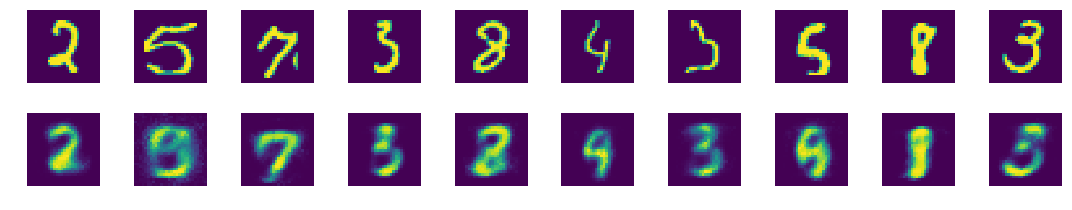

In [101]:
n_examples = 10
fig, axs = plt.subplots(2, n_examples, figsize=(15, 3))
for example_i,ind in enumerate(ind_row_test[:n_examples]):
    axs[0][example_i].imshow(
        np.reshape(test_xs[ind, :], (28, 28)))
    axs[0][example_i].set_axis_off()
    axs[1][example_i].imshow(
            np.reshape([decoded_imgs[ind, :]], (28, 28)))
    axs[1][example_i].set_axis_off()

fig.show()
plt.tight_layout()    

## Can we generate new data sets?

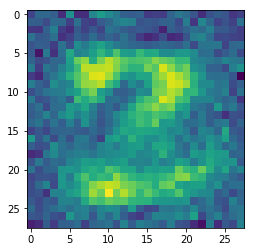

In [114]:
# we start from the second half of the network
random_encoded = np.random.randn(1,encoded_imgs.shape[1])
random_decoded  = decoder.predict(random_encoded)
plt.imshow(random_decoded.reshape(28,28))

# Other Extensions
## Denoising Auto-Encoders
## Variational Auto-Encoders

## Convolutional Auto-Encoders




# Architecture of computational graph is the key!!

# Now other architectures are also easily available

## For example, with a bit of change we have multi-layer perceptrons for prediction

0.01


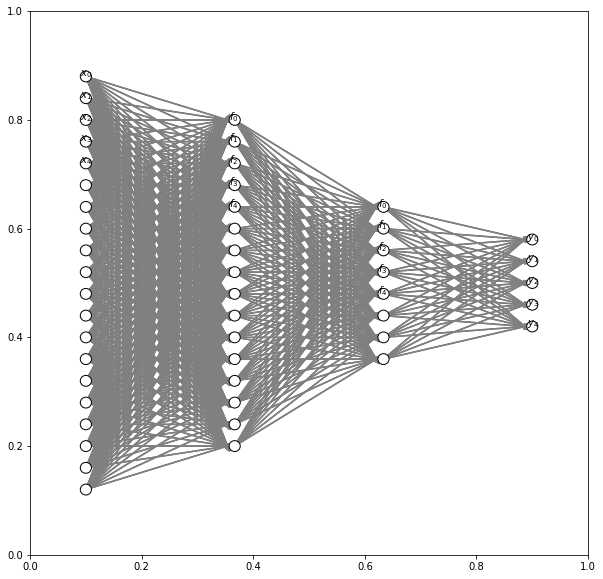

In [117]:


fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [20,16,8,5],)